In [68]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

In [2]:
o_p_t=pd.read_csv("order_products__train.csv")
o_p_p=pd.read_csv("order_products__prior.csv")
orders=pd.read_csv("orders.csv")
products=pd.read_csv("products.csv")
aisles=pd.read_csv("aisles.csv")
departments=pd.read_csv("departments.csv")

### Combining data

In [3]:
ailes_product=pd.merge(aisles,products, how='inner', on='aisle_id')

In [4]:
ailes_product_dep = pd.merge(ailes_product, departments, how='inner', on='department_id')

In [6]:
ailes_product_dep_opt = pd.merge(o_p_t, ailes_product_dep, how='inner', on='product_id')

In [19]:
final_df= pd.merge(orders, ailes_product_dep_opt, how='inner', on='order_id')

In [155]:
df = final_df.drop(['aisle_id','department_id','eval_set'],axis=1)
df.shape

(1384617, 12)

In [156]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle,product_name,department
0,1187899,1,11,4,8,14.0,49235,10,1,cream,Organic Half & Half,dairy eggs
1,1187899,1,11,4,8,14.0,46149,11,1,soft drinks,Zero Calorie Cola,beverages
2,1187899,1,11,4,8,14.0,196,1,1,soft drinks,Soda,beverages
3,1187899,1,11,4,8,14.0,27845,9,0,milk,Organic Whole Milk,dairy eggs
4,1187899,1,11,4,8,14.0,38928,3,1,yogurt,0% Greek Strained Yogurt,dairy eggs


# Data Exploration

In [157]:
display(df.describe())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,1.031128e+05,1.709141e+01,2.701392e+00,1.357759e+01,1.706613e+01,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,5.948715e+04,1.661404e+01,2.167646e+00,4.238458e+00,1.042642e+01,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,5.173200e+04,6.000000e+00,1.000000e+00,1.000000e+01,7.000000e+00,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,1.029330e+05,1.100000e+01,3.000000e+00,1.400000e+01,1.500000e+01,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,1.549590e+05,2.100000e+01,5.000000e+00,1.700000e+01,3.000000e+01,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,8.000000e+01,1.000000e+00


In [158]:
df.nunique()

order_id                  131209
user_id                   131209
order_number                  97
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                 39123
add_to_cart_order             80
reordered                      2
aisle                        134
product_name               39123
department                    21
dtype: int64

##### Checking for Null Values

In [159]:
print(df.isnull().sum())
print("The data doesn't have any null values")

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
aisle                     0
product_name              0
department                0
dtype: int64
The data doesn't have any null values


In [160]:
df.corr() #checking correlation between the numerical predictors

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
order_id,1.000000,-0.000867,0.001522,0.001090,-0.004422,0.002708,-0.000545,0.001916,0.001418
user_id,-0.000867,1.000000,-0.003715,-0.006746,-0.001239,0.003854,-0.001014,0.000739,-0.004316
order_number,0.001522,-0.003715,1.000000,0.024500,-0.026567,-0.403861,-0.001463,0.014332,0.223947
order_dow,0.001090,-0.006746,0.024500,1.000000,0.005910,-0.026765,-0.003597,-0.019353,-0.006714
order_hour_of_day,-0.004422,-0.001239,-0.026567,0.005910,1.000000,0.005184,0.001829,-0.008905,-0.017840
days_since_prior_order,0.002708,0.003854,-0.403861,-0.026765,0.005184,1.000000,0.001036,0.017283,-0.160152
product_id,-0.000545,-0.001014,-0.001463,-0.003597,0.001829,0.001036,1.000000,0.003128,0.006560
add_to_cart_order,0.001916,0.000739,0.014332,-0.019353,-0.008905,0.017283,0.003128,1.000000,-0.146393
reordered,0.001418,-0.004316,0.223947,-0.006714,-0.017840,-0.160152,0.006560,-0.146393,1.000000


<Figure size 3240x1800 with 0 Axes>

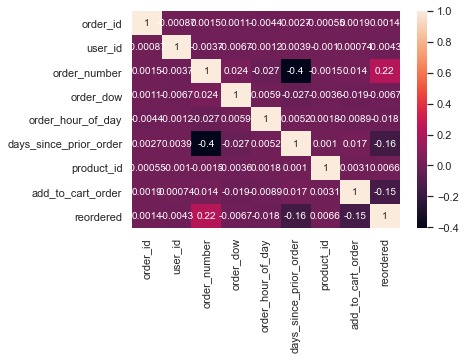

<Figure size 3240x1800 with 0 Axes>

In [161]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True )
plt.figure(figsize=(45,25))

#### Top Ordered Products

In [162]:
df.product_name.value_counts(ascending=False).reset_index().head(10)

,index,product_name
0,Banana,18726
1,Bag of Organic Bananas,15480
2,Organic Strawberries,10894
3,Organic Baby Spinach,9784
4,Large Lemon,8135
5,Organic Avocado,7409
6,Organic Hass Avocado,7293
7,Strawberries,6494
8,Limes,6033
9,Organic Raspberries,5546


/Users/navaroohi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


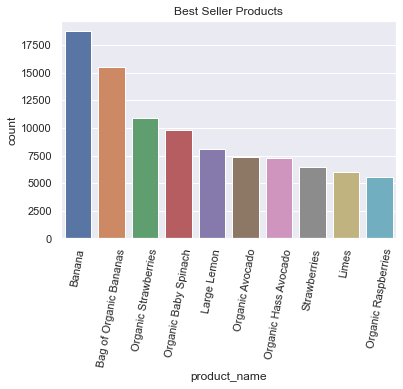

In [163]:
sns.countplot(df.product_name, order=df.product_name.value_counts().index[:10])
plt.title('Best Seller Products')
plt.xticks(rotation=80)
plt.show()

#### Top 10 Seller Departments

In [164]:
df.department.value_counts(ascending=False).reset_index().head(10)

,index,department
0,produce,409087
1,dairy eggs,217051
2,snacks,118862
3,beverages,114046
4,frozen,100426
5,pantry,81242
6,bakery,48394
7,canned goods,46799
8,deli,44291
9,dry goods pasta,38713


/Users/navaroohi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


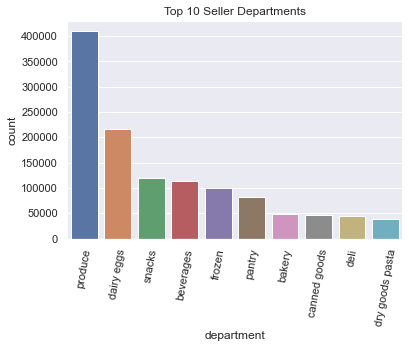

In [165]:
sns.countplot(df.department, order=df.department.value_counts().index[:10])
plt.title('Top 10 Seller Departments')
plt.xticks(rotation=80)
plt.show()

### Aisles with highest sells

/Users/navaroohi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


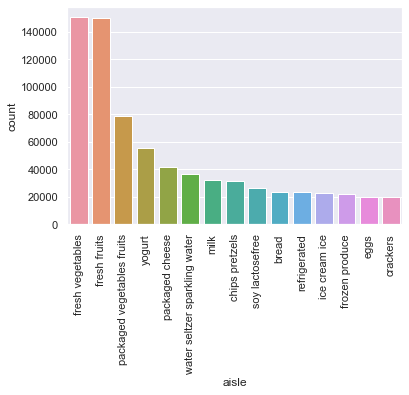

In [166]:
sns.countplot(df.aisle, order=df.aisle.value_counts().index[:15])
plt.title('')
plt.xticks(rotation=90)
plt.show()

#### Busiest hours of the day

/Users/navaroohi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


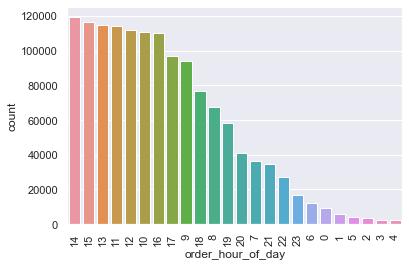

In [167]:
sns.countplot(df.order_hour_of_day, order=df.order_hour_of_day.value_counts().index[:24])
plt.title('')
plt.xticks(rotation=90)
plt.show()

#### Busiest Days of the Week 

/Users/navaroohi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


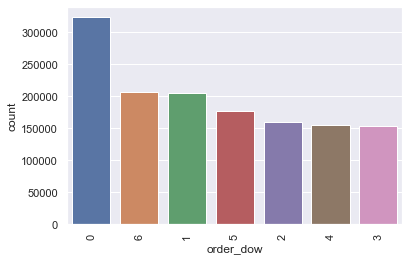

In [168]:
sns.countplot(df.order_dow, order=df.order_dow.value_counts().index[:24])
plt.title('')
plt.xticks(rotation=90)
plt.show()

In [169]:
percentage_of_orders=df.groupby("order_dow")["order_id"].count().reset_index()
percentage_of_orders["percentage"]=percentage_of_orders["order_id"]/percentage_of_orders["order_id"].sum()
percentage_of_orders.head()

,order_dow,order_id,percentage
0,0,324026,0.234019
1,1,205978,0.148762
2,2,160562,0.115961
3,3,154381,0.111497
4,4,155481,0.112292


####  Days Since Prior Order

<AxesSubplot:>

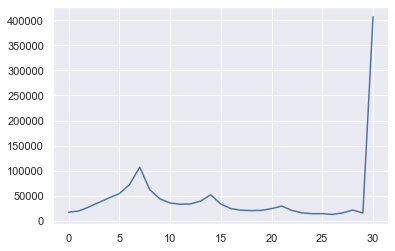

In [170]:
df.days_since_prior_order.value_counts().sort_index().plot()


Most orderes are being ordered after 6-7 days. It appears to peak by 14 days and 21 days which could indicate the weekly purchase habit of custoemrs.

#### orders per customer

In [171]:

orders_per_customer=orders.groupby("user_id")["order_number"].max().reset_index()
orders_per_customer.head(15)

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
5,6,4
6,7,21
7,8,4
8,9,4
9,10,6


/Users/navaroohi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Customers')

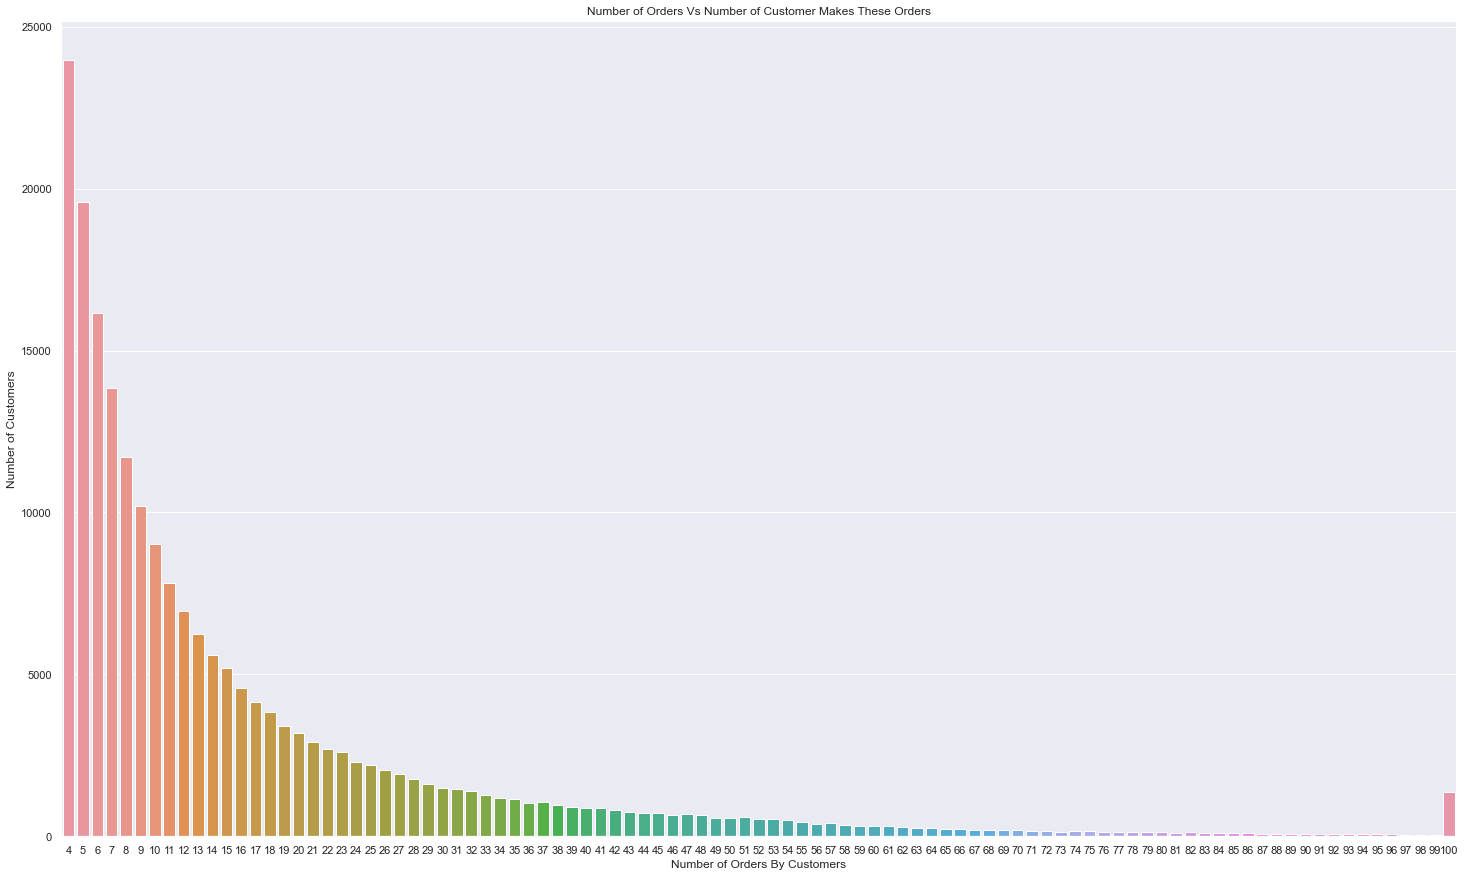

In [172]:
plt.figure(figsize=(25,15))
sns.countplot(orders_per_customer["order_number"])
plt.title("Number of Orders Vs Number of Customer Makes These Orders")
plt.xlabel("Number of Orders By Customers")
plt.ylabel("Number of Customers")


We can see that  23986 customers made only 4 orders, 19590 customers only made 5 orders and so on... As the number of orders made by customers goes up, the number of customers that makes those orders goes down. Majority of the customers make 4 to 12 orders. If business finds way to increase the amount of orders from repeat customers, it can increase the revenue.

#### The distribution of department categories across reordered column

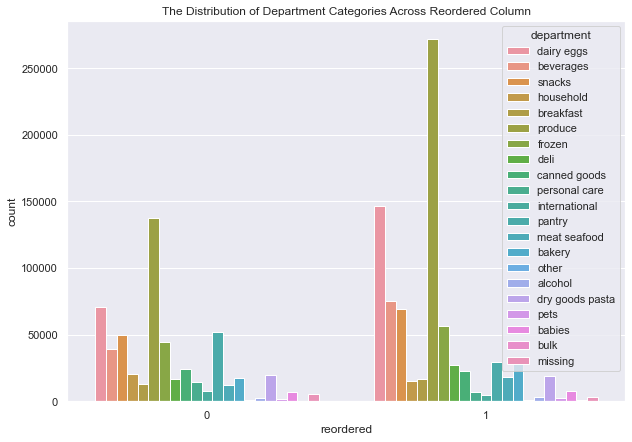

In [173]:


plt.figure(figsize=(10,7))
sns.countplot(data=df,
            x="reordered",
         
            hue="department"
           
            
           )

plt.title("The Distribution of Department Categories Across Reordered Column")
plt.show()

It appears that we have imbalance issue in our reordered column, we would have to impelemt balancing which will be done in data preprocessing section.


## Data Cleaning and Data Processing

#### Detecting duplicates and removing them 

In [174]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle,product_name,department


The data doesn't have any duplicate values

### Balance Dataset

In [175]:
df_bal = df.groupby(["department", "reordered"])[["department", "reordered"]]
df_balanced = df_bal.apply(lambda x: x.sample(df_bal.size().min()).reset_index(drop=True))
df_balanced.shape

(24066, 2)

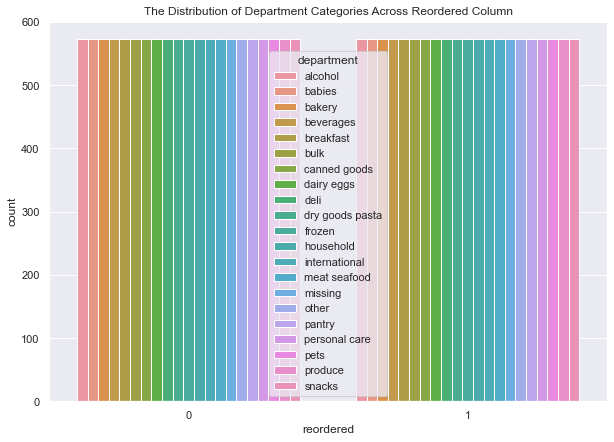

In [176]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_balanced,
            x="reordered",
         
            hue="department"
           
            
           )

plt.title("The Distribution of Department Categories Across Reordered Column")
plt.show()

### How frequent a customer has reordered products

This feature is a ratio which shows for each user in what extent has 
products that have been reordered in the past: 
So we create the following ratio: 

In [183]:
u_reorder = df.groupby('user_id')['reordered'].mean().to_frame('u_reordered_ratio')
u_reorder = u_reorder.reset_index()
u_reorder.head(15)

,user_id,u_reordered_ratio
0,1,0.909091
1,2,0.387097
2,5,0.444444
3,7,0.888889
4,8,0.222222
5,9,1.000000
6,10,0.000000
7,13,0.800000
8,14,0.727273
9,17,0.500000


### 2.2.1 Number of purchases for each product

We calculate the total number of purchases for each product (from all customers). We create a prd DataFrame to store the results.

In [190]:
# Create distinct groups for each product, count the orders, save the result for each product to a new DataFrame 

prd = df.groupby('product_id')['order_id'].count().to_frame('p_total_purchases')
prd.head()

,p_total_purchases
product_id,
1,76
2,4
3,6
4,22
5,1


In [185]:
# Reset the index of the DF so to bring product_id rom index to column (pre-requisite for step 2.4)
prd = prd.reset_index()
prd.head()

,product_id,p_total_purchases
0,1,76
1,2,4
2,3,6
3,4,22
4,5,1


### 2.2.2.1 Removing  products with less than 40 purchases 

In [187]:
p_reorder = df.groupby('product_id').filter(lambda x: x.shape[0] >260)
p_reorder.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle,product_name,department
0,1187899,1,11,4,8,14.0,49235,10,1,cream,Organic Half & Half,dairy eggs
1,1187899,1,11,4,8,14.0,46149,11,1,soft drinks,Zero Calorie Cola,beverages
2,1187899,1,11,4,8,14.0,196,1,1,soft drinks,Soda,beverages
3,1187899,1,11,4,8,14.0,27845,9,0,milk,Organic Whole Milk,dairy eggs
4,1187899,1,11,4,8,14.0,38928,3,1,yogurt,0% Greek Strained Yogurt,dairy eggs


In [188]:
p_reorder.shape

(694239, 12)

In [189]:
p_reorder = p_reorder.groupby('product_id')['reordered'].mean().to_frame('p_reorder_ratio')
p_reorder = p_reorder.reset_index()
p_reorder.head()

,product_id,p_reorder_ratio
0,45,0.697600
1,196,0.810219
2,260,0.609877
3,311,0.594306
4,329,0.808333
